# Introdução

A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. 

Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes 
deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.


Há vários fatores que levam a essa atitude do consumidor, desde insatisfação com o produto
ou atendimento (seria um motivo voluntário), mas ainda, há os motivos involuntários.

Os motivos involuntários seriam a falta de dinheiro, mudança de endereço, óbito...


# Objetivos

Uma das maneiras de se reduzir a perda de clientes, se dá através de uma análise detalhada 
e periódica do comportamento desses consumidores.

Nosso interesse é identificar o perfil de clientes que cancelaram o serviço com agência bancária e tentar prever clientes em risco de Churn. 

Com isso, a análise de dados e algoritmos de machine learning são as técnicas utilizadas para esse fim.
Nesse projeto iremos vericar esse comportamento, através dos dados coletados e criar modelos que dêem
uma previsão de clientes em risco de churn.

# Dados

No conjunto de dados temos as seguintes variáveis:

- CustomerId: identificação do cliente;

- Surname: sobrenome do cliente;
- CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
- Geography: país que o serviço é oferecido;
- Gender: gênero do cliente;
- Age: idade do cleinte;
- Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.
- Balance: saldo da conta corrente;
- NumOfProducts: número de produtos bancários adquiridos;
- HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
- IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
- EstimatedSalary: salário estimado;
- Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).

# Etapas

* Obtenção dos Dados
* Análise Exploratória e Visualização dos dados
* Pré-processamento
* Machine Learning
* Conclusões

# Coleta de dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('Churn_Modelling.csv')

In [3]:
df.head (10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Análise descritiva dos dados
#70% dos meus clientes tem carão de crédito, 51% é cliente ativo, média de 100.000$ de salário, 
# churn de 20% em média, pode-se considerar alto!

# A variável 'Exited' é a variável adequada para alcançar os objetivos propostos.

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Insights iniciais

O histograma da variável Idade mostra uma distribuição assimétrica a esquerda, ou seja, a maioria dos clientes têm entre 30 a 45 anos e poucos clientes têm idade superior a 60 anos. Há muitos clientes jovens, de repente, isso seja um indicativo do cancelamento.

Já, o histograma da variável Balance (saldo bancário), mostra uma inflação de clientes que têm pouco dinheiro na conta bancária, isso pode ser um indicativo que esses clientes possuem outra conta bancária.

Analisando o gráfico da variável Cartão de Crédito, observa-se que a maioria dos clientes possuem cartão de crédito.

A variável Exited apresenta que poucos clientes cancelaram sua conta bancária.


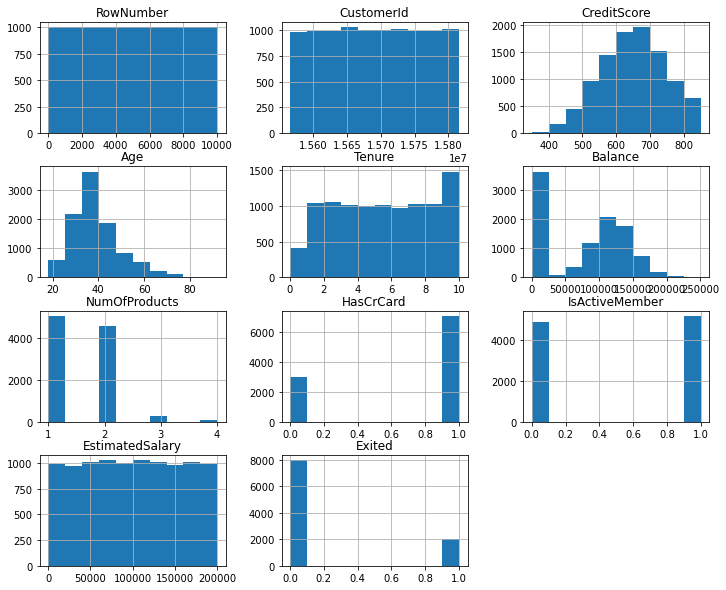

In [6]:
df.hist (figsize = (12, 10));

### Identificando qual o perfil de clientes que cancelaram o contrato (Churn)

In [7]:
# Análise geral das variáveis numéricas

df['Exited_cat']=df['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']

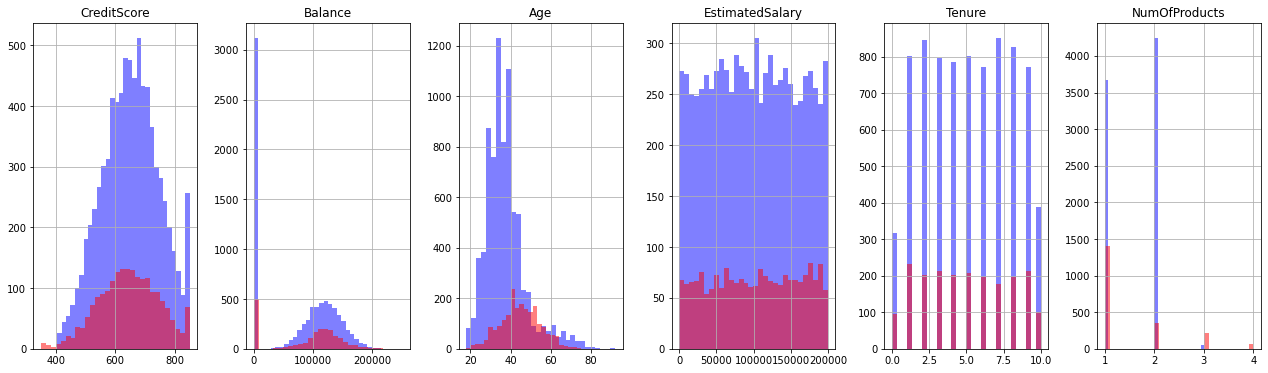

In [8]:
# Faixa etária em torno de 40 anos apresentaram mais churn, assim como
# com baixo escore de crédito

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 6, figsize=(22, 6));
df[df.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

In [9]:
import numpy as np
import seaborn as sns

In [10]:
#escolha de cores para os gráficos posteriores

myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

In [11]:
# 20% dos meus clientes cancelaram o contrato

df ['Exited'].sum()/df ['Exited'].count() *100

20.369999999999997

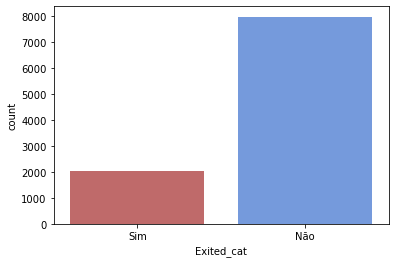

In [12]:
sns.countplot(data=df,x='Exited_cat',palette=cols);

**Análise das variáveis categóricas**

* **Gênero**

In [13]:
df ['Gender'] = df ['Gender'].replace (['Female', 'Male'], ['Feminino', 'Masculino'])

In [14]:
# Há uma tendência de mais mulheres (25%) cancelarem do que os homens

df_plot = df.groupby ('Gender'). Exited.mean (). reset_index() 
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


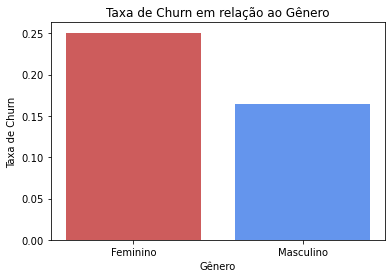

In [15]:
x = df_plot ['Gender']
y = df_plot ['Exited']

plt.bar (x, y, color = cols);
plt.title ('Taxa de Churn em relação ao Gênero')
plt.xlabel ('Gênero');
plt.ylabel ('Taxa de Churn');

* **Países**

In [16]:
df['Geography']=df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])


In [17]:
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


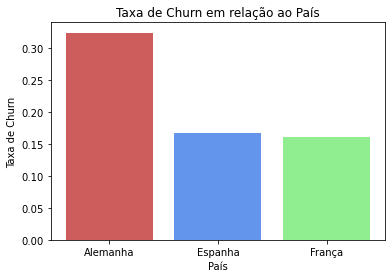

In [18]:
#País em relação a variável churn
# Há uma tendência de maior taxa de cancelamento de clientes da Alemanha

x =df_plot['Geography']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

* **Variável Cartão de Crédito**

In [19]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])

In [20]:
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


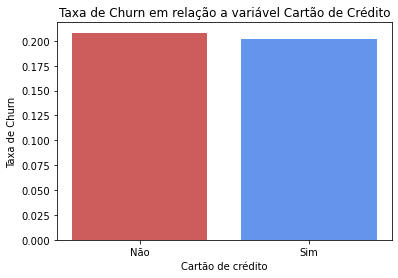

In [21]:
# Carão de crédito em relação a variável churn
# Ter ou não cartão de crédito parece não influenciar no churn

x =df_plot['HasCrCard']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

* **Variável Membro Ativo**

In [22]:
df['IsActiveMember']=df['IsActiveMember'].replace([0,1],['Não','Sim'])


In [23]:
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
df_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


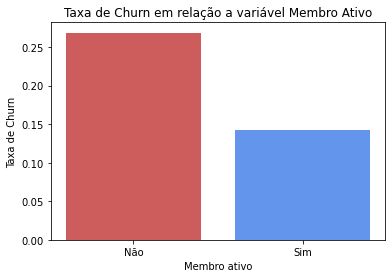

In [24]:
# O Churn entre os clientes que não são ativos é maior do que os clientes ativos, 
# com uma diferença de aproximadamente 12%.

x =df_plot['IsActiveMember']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

**Variáveis Numéricas**

In [25]:
df_cont=df[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
df_cont

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


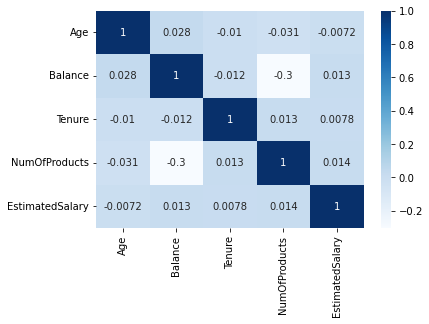

In [26]:
# Uso de correlação para entender a relação entre as variáveis

# O gráfico mostrou baixas correlações, sendo uma correlação negativa entre saldo bancário e produtos

sns.heatmap(df_cont.corr(),annot = True, cmap='Blues');

* **Variável Número de Produtos**

In [27]:
df_plot = df.groupby ('NumOfProducts').Exited.mean(). reset_index () 
df_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


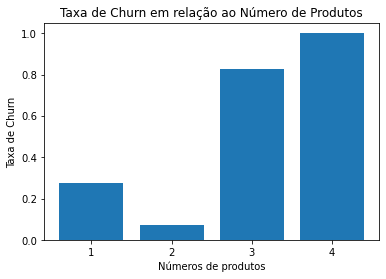

In [28]:
#Número de produtos em relação a variável churn
# Quanto mais produtos, maior a taxa de churn

x =df_plot['NumOfProducts']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

* **Variável Tenure**

In [29]:
df_plot = df.groupby ('Tenure'). Exited.mean (). reset_index () 

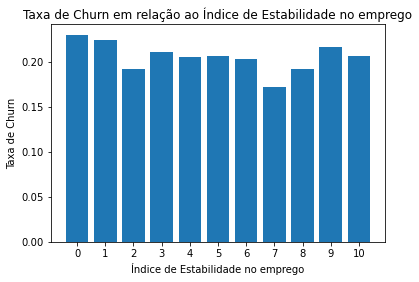

In [30]:
#ìndice de estabilidade no emprego relação a variável churn
# não parece influenciar

x =df_plot['Tenure']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

* **Variável Saldo Bancário**

Exited_cat
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

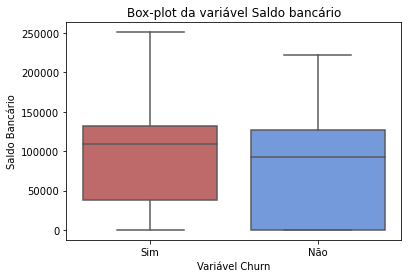

In [31]:
#Clientes que cancelaram os serviços bancários possui um saldo bancários maior 
#do que aqueles clientes que não cancelaram o serviço.

cols= [myred, myblue,mygreen]
sns.boxplot(x="Exited_cat", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited_cat'])['Balance'].mean()

* **Variável Salário Estimado**

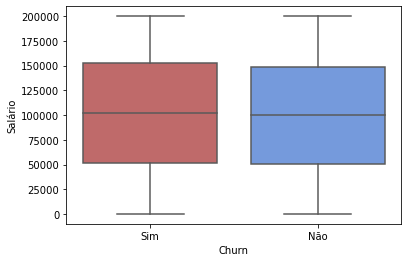

In [32]:
#O salário estimado parece não influenciar no cancelamento ou não do serviço bancário.

sns.boxplot(x="Exited_cat", y="EstimatedSalary" , data=df,palette=cols);
df.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');

* **Variável Idade**


In [33]:
df_plot = df.groupby ('Age'). Exited.mean (). reset_index () 

Text(0, 0.5, 'Taxa de Churn')

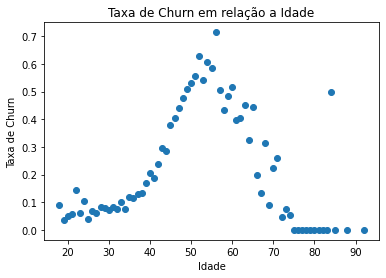

In [34]:
#Tendência de pessoas com mais idade cancelaram com mais frequência
#e clientes com mais de 75 anos tem risco quase zero de abandonar os serviços bancários.

x = df_plot['Age']
y = df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

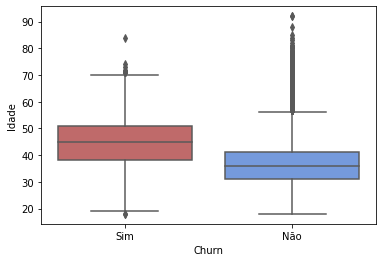

In [35]:
sns.boxplot(x="Exited_cat", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

* **Variável Escore de Crédito**

Text(0, 0.5, 'Taxa de Churn')

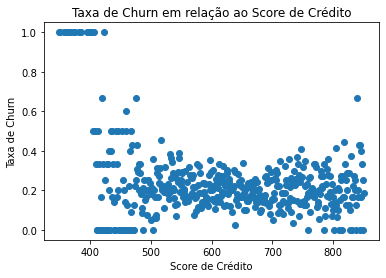

In [36]:
# A taxa de Churn é maior entre os clientes com baixo escore de crédito.

df_plot = df.groupby ('CreditScore'). Exited.mean (). reset_index () 

x =df_plot['CreditScore']
y=df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')

Observa-se que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

# Machine Learning - Construção do Modelo

## Pré Processamento dos Dados

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados faltantes;
* Separação das variáveis categóricas, numéricas e resposta;
* Processamento variáveis categóricas;
* Processamento variáveis numéricas.

In [37]:
# Eliminação de variáveis

df1 = df.drop (columns = ['RowNumber', 'CustomerId', 'Surname', 'Exited_cat'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57,1
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63,0
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64,0
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77,0
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58,1
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52,1


In [39]:
# Verificação de dados faltantes

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Exited_cat         0
dtype: int64

In [40]:
# Separando as variáveis 'feature' e 'target'

y = df1['Exited']
X = df1
X = df1.drop('Exited',axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52


In [41]:
# Separação das variáveis categóricas das contínuas

x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [42]:
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies=X[x_cat]
x_dummies

,NumOfProducts,HasCrCard,Gender,IsActiveMember,Geography
0,1,Sim,Feminino,Sim,França
1,1,Não,Feminino,Sim,Espanha
2,3,Sim,Feminino,Não,França
3,2,Não,Feminino,Não,França
4,1,Sim,Feminino,Sim,Espanha
...,...,...,...,...,...
9995,2,Sim,Masculino,Não,França
9996,1,Sim,Masculino,Sim,França
9997,1,Não,Feminino,Sim,França
9998,2,Sim,Masculino,Não,Alemanha


**Processamento variáveis categóricas**

In [50]:
##Substituindo a variável gênero para 0 e 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,0,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,0,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,0,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,0,43,2,125510.82,1,Sim,Sim,79084.10
5,645,Espanha,1,44,8,113755.78,2,Sim,Não,149756.71
6,822,França,1,50,7,0.00,2,Sim,Sim,10062.80
7,376,Alemanha,0,29,4,115046.74,4,Sim,Não,119346.88
8,501,França,1,44,4,142051.07,2,Não,Sim,74940.50
9,684,França,1,27,2,134603.88,1,Sim,Sim,71725.73


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['HasCrCard'] = le.fit_transform(X['HasCrCard']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,1,Sim,101348.88
1,608,Espanha,0,41,1,83807.86,1,0,Sim,112542.58
2,502,França,0,42,8,159660.80,3,1,Não,113931.57
3,699,França,0,39,1,0.00,2,0,Não,93826.63
4,850,Espanha,0,43,2,125510.82,1,1,Sim,79084.10
5,645,Espanha,1,44,8,113755.78,2,1,Não,149756.71
6,822,França,1,50,7,0.00,2,1,Sim,10062.80
7,376,Alemanha,0,29,4,115046.74,4,1,Não,119346.88
8,501,França,1,44,4,142051.07,2,0,Sim,74940.50
9,684,França,1,27,2,134603.88,1,1,Sim,71725.73


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['IsActiveMember'] = le.fit_transform(X['IsActiveMember']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,1,1,101348.88
1,608,Espanha,0,41,1,83807.86,1,0,1,112542.58
2,502,França,0,42,8,159660.80,3,1,0,113931.57
3,699,França,0,39,1,0.00,2,0,0,93826.63
4,850,Espanha,0,43,2,125510.82,1,1,1,79084.10
5,645,Espanha,1,44,8,113755.78,2,1,0,149756.71
6,822,França,1,50,7,0.00,2,1,1,10062.80
7,376,Alemanha,0,29,4,115046.74,4,1,0,119346.88
8,501,França,1,44,4,142051.07,2,0,1,74940.50
9,684,França,1,27,2,134603.88,1,1,1,71725.73


In [64]:
# variáveis com mais categorias - uso do método get dummies

x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts'])
x_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,0,0,1,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,1,0,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,0,0,1,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,0,1,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,0,0,1,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,0,0,1,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,0,0,1,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,1,0,0,0,1,0,0


**Processamento variáveis numéricas**

O método MiniMax é definido como

valor_padronizado = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

In [63]:
# Padronizar primeiramente as variáveis, pois estão em escalas diferentes

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


# Modelo de Churn

Prever o Churn de clientes é um problema de classificação binária (1 se Churn e 0 caso contrário).


In [62]:
# Separação dos dados em treino e teste

from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,0,0,1,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,0,0,1,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,1,0,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,0,0,1,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,1,0,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,1,0,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,0,0,1,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,0,0,1,0,1,0,0


In [75]:
# Predição modelo Árvore de Decisão

from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 

In [77]:
rf.fit (x_treino, y_treino);

In [78]:
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1917   63  1980
1         267  253   520
All      2184  316  2500


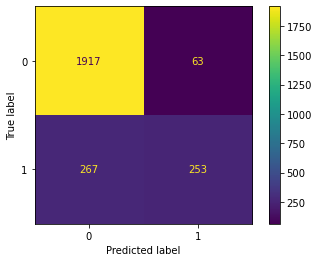

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions (y_teste, y_rf);

#Observa-se muitos falsos negativo nesse modelo. Com isso, vamos testar outro modelo posteriormente.


In [80]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.80      0.49      0.61       520

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [81]:
#Analisando a importância de cada variável
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.226809
EstimatedSalary,0.145475
Balance,0.143226
CreditScore,0.142028
Tenure,0.085442
NumOfProducts_2,0.055751
IsActiveMember,0.040259
NumOfProducts_3,0.037897
NumOfProducts_1,0.029719
Geography_Alemanha,0.021652


**Teste do modelo XGBoost**

In [84]:
from numpy import loadtxt

! pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [85]:
# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)
 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [86]:
#fazendo as predições no dados de teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1886   94  1980
1         265  255   520
All      2151  349  2500


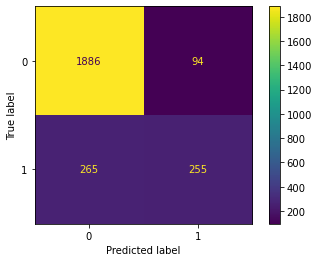

In [87]:
ConfusionMatrixDisplay.from_predictions (y_teste, preditos_xgb);

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1980
           1       0.73      0.49      0.59       520

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



Acurácia de 86% nesse modelo

A acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto 
o modelo Random Forest, por isso a acurácia foi menor.
No entanto, as diferenças foram mínimas entre os modelos.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

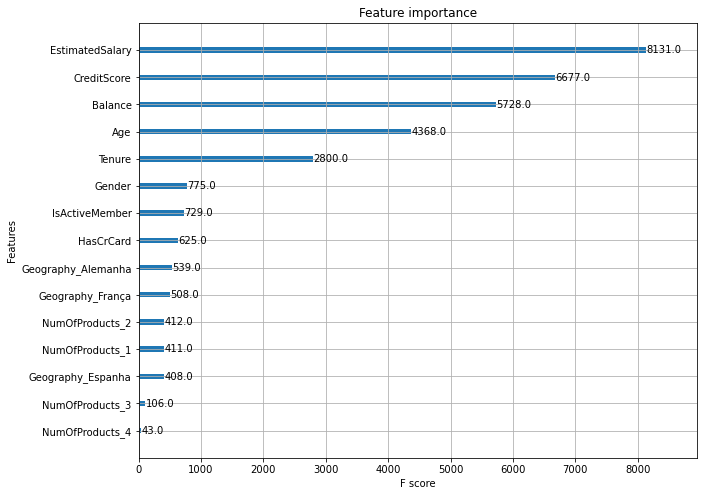

In [89]:
#Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

As variáveis mais importantes para prever o Churn dos clientes foram: idade, saldo bancário, número de produtos, pontuação de crédito, estimativa de salário, membro ativo e país: Alemanha.

**Métodos Ensemble**


**Melhorar a previsão do Churn: combinar os dois melhores modelos, Random Forest e XGBoost.**

In [90]:
from sklearn.ensemble import VotingClassifier

voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)


In [91]:
y_predito = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1905   75  1980
1         265  255   520
All      2170  330  2500


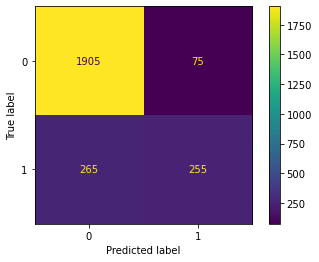

In [92]:
ConfusionMatrixDisplay.from_predictions (y_teste, y_predito);

In [93]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1980
           1       0.77      0.49      0.60       520

    accuracy                           0.86      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.86      0.85      2500



Ao combinar os modelos observamos uma melhora discreta nas medidas de validação, assim vamos considerar os modelos combinados como o nosso melhor modelo. Apesar que o modelo inicial da árvore de decisão também poderia ser considerada isoladamente.

In [98]:
#Acurácia de 86% nos meus dados de teste foram satisfatórios

from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste, voto.predict_proba (x_teste)[:,1])

0.8636169386169387

**Probabilidade de Churn**

In [94]:
# A partir desses dados, é possível tomar medidas preventivas para os clientes não 
# darem churn

df['proba'] = voto.predict_proba(x_final[x_treino.columns])[:,1]
df[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.203457
1,15647311,0.219508
2,15619304,0.848697
3,15701354,0.178671
4,15737888,0.152523
...,...,...
9995,15606229,0.107985
9996,15569892,0.187021
9997,15584532,0.297045
9998,15682355,0.196035


# Conclusões

O modelo XGBost e Random Forest se mostraram eficiente para prever a probabilidade do Churn dos clientes. As variáveis mais importante para prever o Churn foram a idade do cliente, o saldo bancário e o número de produtos, ou seja, quanto maior o produto maior o risco de Chun.

O modelo final, foi a combinação dos modelos XGBoost e Random Forest. Com modelo de Churn podemos prever clientes com a maior chance de cancelar o serviço e assim tomar medidas preventivas, afim de evitar essa saída.

Podemos melhorar a predição desse modelo categorizando as variáveis contínuas e balanceando as amostras posteriormente.